# 1. Data Exploration and Pre-processing

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('heart_disease_uci.csv')

In [11]:
# Explore dataset structure
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nColumns:")
print(df.columns)

=== Dataset Overview ===
Shape: (920, 16)

First 5 rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3      

In [12]:
# Convert target to binary classification
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
# Handle missing values
# Remove columns with >40% missing data
df = df.drop(['slope', 'ca', 'thal'], axis=1)

# Impute numerical features
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical features
cat_cols = ['restecg', 'exang', 'fbs']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'fbs'])

C:\Users\pc\AppData\Local\Temp\ipykernel_25320\414549105.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_25320\414549105.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [14]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_cols])
df[num_cols] = scaled_features

In [15]:
# Remove unnecessary columns
df = df.drop(['id', 'dataset', 'num'], axis=1)

# 2. Train Decision Tree Model

In [17]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [18]:
# Initialize and train model
model = DecisionTreeClassifier(
    max_depth=3,  # Limit depth for interpretability
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# 3. Model Evaluation

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Calculate metrics
print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")


=== Model Evaluation ===
Accuracy: 0.77
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


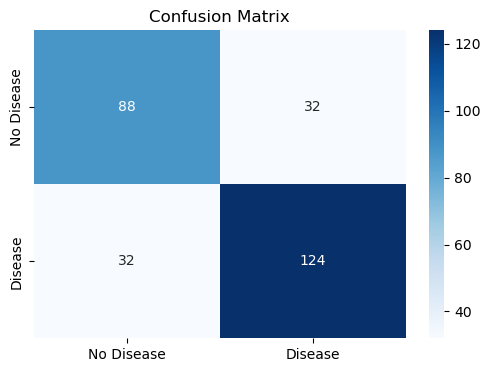

In [22]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.show()

# 4. Visualize Decision Tree

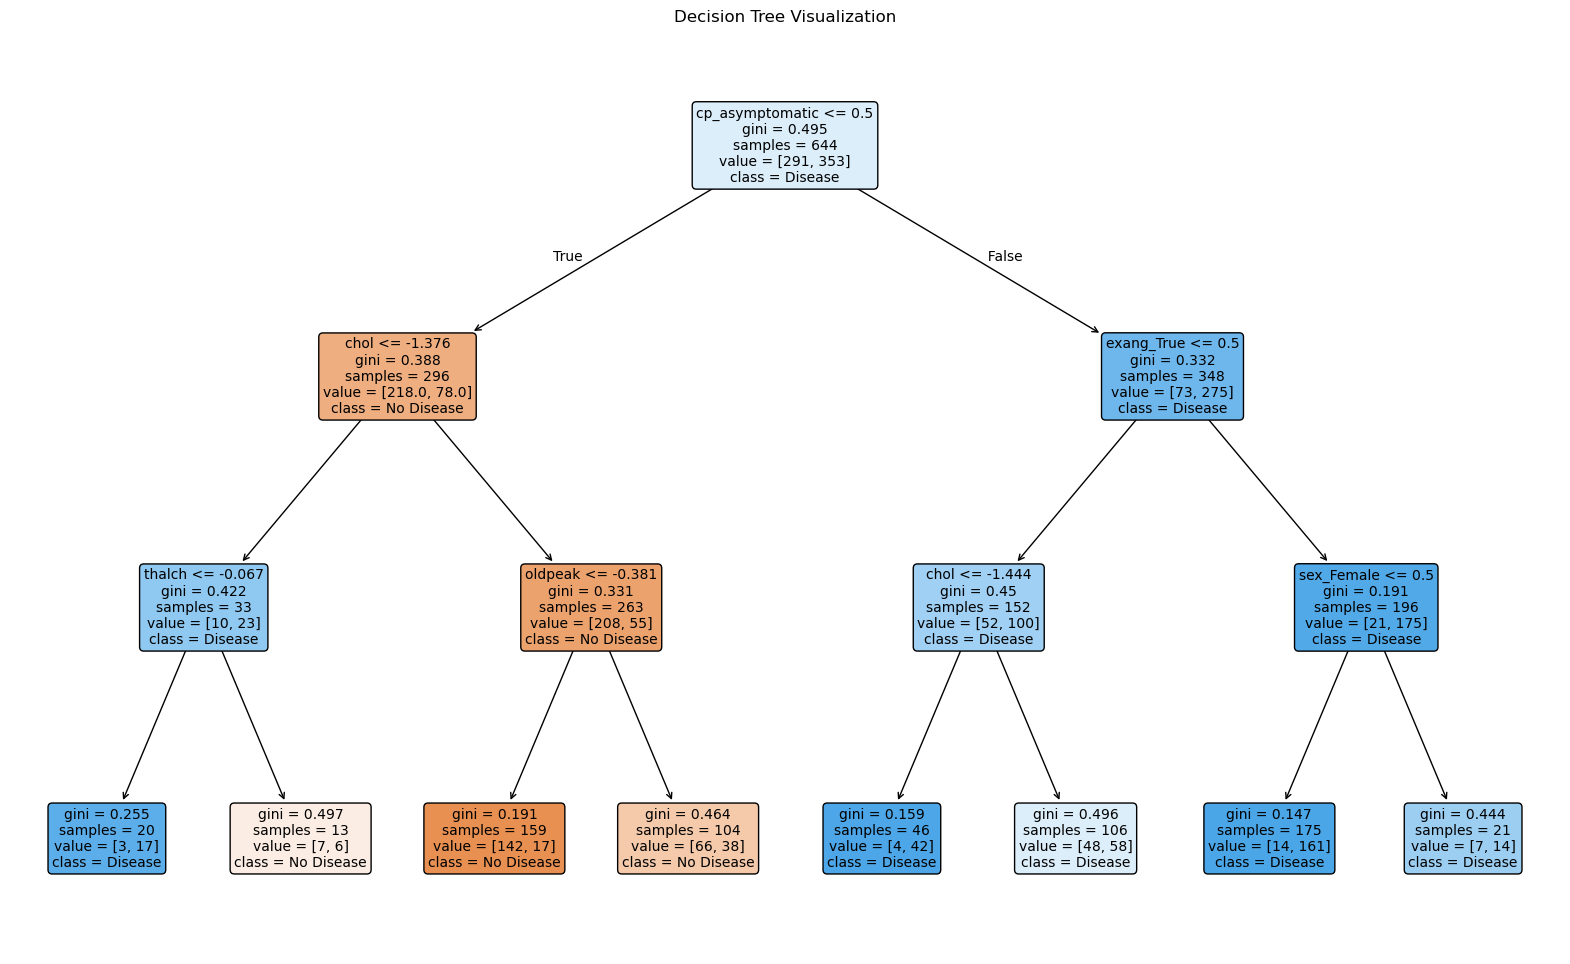

In [24]:
plt.figure(figsize=(20,12))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

#5. Feature Importance Analysis

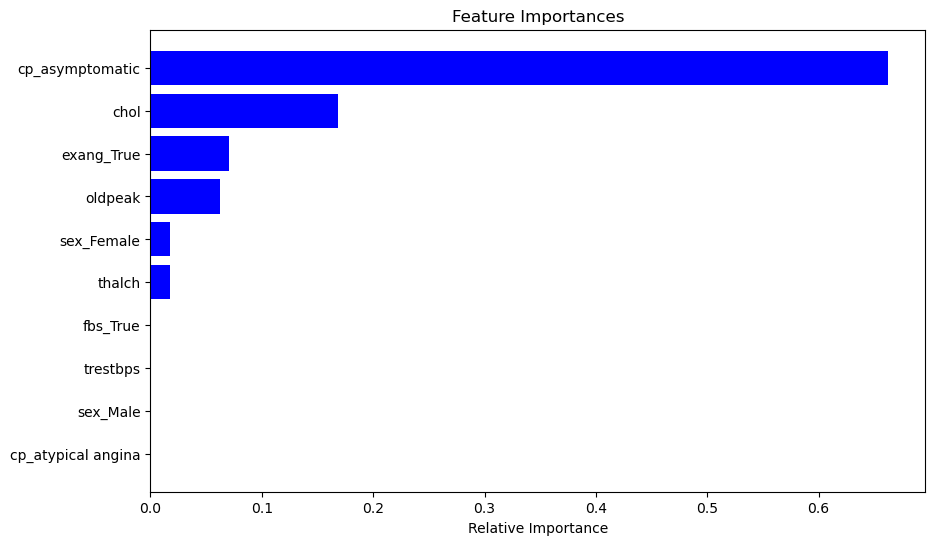

In [26]:
plt.figure(figsize=(10,6))
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#6. Bonus: New Patient Prediction

In [28]:
# Sample new patient data (use ALL categories from training)
new_patient = {
    'age': 55,
    'trestbps': 130,
    'chol': 250,
    'thalch': 150,
    'oldpeak': 1.2,

    # Categorical features - must include ALL possible dummy columns
    'sex_Female': 0,
    'sex_Male': 1,
    'cp_asymptomatic': 0,
    'cp_atypical angina': 0,
    'cp_non-anginal': 1,
    'cp_typical angina': 0,
    'restecg_lv hypertrophy': 0,
    'restecg_normal': 1,
    'restecg_st-t abnormality': 0,
    'exang_False': 1,
    'exang_True': 0,
    'fbs_False': 1,
    'fbs_True': 0
}

In [29]:
# Create DataFrame with ALL columns from training
new_df = pd.DataFrame([new_patient], columns=X_train.columns)

# Fill missing numerical columns (if any)
new_df[num_cols] = scaler.transform(new_df[num_cols])

In [30]:
# Predict
prediction = model.predict(new_df)
print("\n=== New Patient Prediction ===")
print("Heart Disease Prediction:", "Yes" if prediction[0] == 1 else "No")


=== New Patient Prediction ===
Heart Disease Prediction: No
